In [1]:
# @title YoloR Setup  and requirements installation

from IPython.display import clear_output

!git clone -b paper https://github.com/WongKinYiu/yolor.git
%cd yolor
!git clone https://github.com/fbcotter/pytorch_wavelets
%cd pytorch_wavelets
!pip install -r requirements.txt
!pip install .
%cd ../..

clear_output()

In [2]:
# @title Download assets and replacement files
!wget -qnc https://www.dropbox.com/sh/jn3y8dxahhqt41m/AACGBR7uMWcyUpn-Y3YFweXya?dl=1 -O additional_materials.zip
!unzip -qq /content/additional_materials.zip

mapname:  conversion of  failed


In [3]:
# @title Copy and replace Yolor files
!cp /content/updated_yolor_repo_files/detect.py /content/yolor
!cp /content/updated_yolor_repo_files/detect_video.py /content/yolor
!cp /content/updated_yolor_repo_files/config.py /content/yolor
!cp /content/updated_yolor_repo_files/experimental.py /content/yolor/models
!cp /content/updated_yolor_repo_files/yolo.py /content/yolor/models
!cp /content/updated_yolor_repo_files/datasets.py /content/yolor/utils

In [4]:

#@title Download weights
download_weights = True #@param {type:"boolean"}

if download_weights:
    !wget -qnc https://github.com/WongKinYiu/yolor/releases/download/weights/yolor-p6-paper-541.pt -P yolor/weights/
    !wget -qnc https://github.com/WongKinYiu/yolor/releases/download/weights/yolor-w6-paper-555.pt -P yolor/weights/
    !wget -qnc https://github.com/WongKinYiu/yolor/releases/download/weights/yolor-e6-paper-564.pt -P yolor/weights/
    !wget -qnc https://github.com/WongKinYiu/yolor/releases/download/weights/yolor-d6-paper-573.pt -P yolor/weights/

    # yolor-s4-s2d - https://drive.google.com/file/d/1rFoRk1ZoKvE8kbxAl2ABBy6m9Zl6_k4Y/view
    !gdown 1rFoRk1ZoKvE8kbxAl2ABBy6m9Zl6_k4Y
    !mv /content/yolor-ssss-s2d.pt /content/yolor/weights/yolor-ssss-s2d.pt

    # yolor-s4-dwt - https://drive.google.com/file/d/1IZ1ix1hwUjEMcCMpl67CHQp98XOjcIsv/view
    !gdown 1IZ1ix1hwUjEMcCMpl67CHQp98XOjcIsv
    !mv /content/yolor-ssss-dwt.pt /content/yolor/weights/yolor-ssss-dwt.pt
else:
    pass

Downloading...
From: https://drive.google.com/uc?id=1rFoRk1ZoKvE8kbxAl2ABBy6m9Zl6_k4Y
To: /content/yolor-ssss-s2d.pt
100% 18.7M/18.7M [00:01<00:00, 12.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IZ1ix1hwUjEMcCMpl67CHQp98XOjcIsv
To: /content/yolor-ssss-dwt.pt
100% 18.7M/18.7M [00:01<00:00, 14.5MB/s]


# Run Inference on Image

In [5]:
!python ./yolor/detect.py \
    --weights ./yolor/weights/yolor-w6-paper-555.pt \
    --source ./assests/horses.jpg \
    --img-size 1280 \
    --device cpu \
    --project ./inference_tests \
    --name W6_results \
    --exist-ok

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='cpu', exist_ok=True, img_size=1280, iou_thres=0.45, name='W6_results', project='./inference_tests', save_conf=False, save_txt=False, source='./assests/horses.jpg', update=False, view_img=False, weights=['./yolor/weights/yolor-w6-paper-555.pt'])
Using torch 1.13.0+cu116 CPU

Fusing layers... 
Model Summary: 519 layers, 79839352 parameters, 0 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/1 /content/assests/horses.jpg: 896x1280 5 horses, Done. (5.616s)
Results saved to inference_tests/W6_results
Done. (5.750s)


In [6]:
# !python ./yolor/detect.py \
#     --weights ./yolor/weights/yolor-ssss-s2d.pt \
#     --source ./assests/horses.jpg \
#     --img-size 640 \
#     --device cpu \
#     --project ./inference_tests \
#     --name S2D_results \
#     --exist-ok

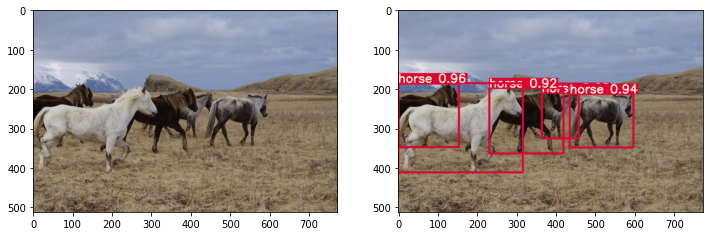

In [7]:
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
image = plt.imread(os.path.join(os.getcwd(), "assests", "horses.jpg"))
plt.imshow(image)

plt.subplot(1, 2, 2)
image = plt.imread(os.path.join(os.getcwd(), "inference_tests", "W6_results", "horses.jpg"))
plt.imshow(image)

plt.show()

# Run Inference on Videos

In [8]:
!python ./yolor/detect_video.py \
    --weights ./yolor/weights/yolor-ssss-dwt.pt \
    --model-name YoloR-S4-DWT \
    --source ./assests/test_video.mp4 \
    --img-size 640 \
    --device cpu \
    --project ./inference_tests \
    --name DWT_results \
    --exist-ok

Fusing layers... 
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Results saved to inference_tests/DWT_results
Done. (35.411s)
Average FPS [YoloR-S4-DWT (640)]: 3.808920087717618



In [9]:
# !python ./yolor/detect_video.py \
#     --weights ./yolor/weights/yolor-p6-paper-541.pt \
#     --model-name YoloR-P6 \
#     --source ./assests/test_video.mp4 \
#     --img-size 640 \
#     --device cpu \
#     --project ./inference_tests \
#     --name P6_results \
#     --exist-ok